<a href="https://colab.research.google.com/github/lschulte19/algoritmo-classificacao/blob/main/Ladan_Machado_Algoritmos_de_Intelig%C3%AAncia_Artificial_para_classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Biblioteca que vamos usar nesse projeto
from google.colab import drive
import pandas as pd
import seaborn as sns
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import davies_bouldin_score
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.base import clone


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/winequalityN.csv', 'r') as f:
   file_contents = f.read()

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


As variaveis do meu dataset
**Index**: Variavel Discreta
           Identificador de cada linha

**type**: Variavel categorica
          Indica o tipo de vinho

**fixed acidity**: Variavel contínua
                   Indica a acidez do vinho
**volatile acidity**: Variável contínua
                      Mede a acidez volátil
**citric acid**: Variável contínua
                 Mede a quantidade de ácido cítrico
**residual sugar**: Variável contínua
                    Mede a quantidade de açúcar residual
**chlorides**: Variável contínua
               Mede a quantidade de cloreto

**free sulfur dioxide**: Variavel contínua
                         Mede a quantidade de dióxido de enxofre livre

**total sulfur dioxide**: Variavel contínua
                          Mede a quantidade total de dióxido de enxofre

**density**: Variavel contínua
            Mede a densidade do vinho

**pH**: Variável contínua
        Mede a acidez do vinho

**sulphatesd**: Variável contínua
                Mede a quantidade de sulfatos

**alcohol**: Variável contínua
             Mede o teor alcoólico do vinho

**quality**: Variável discreta  
             Avaliação da qualidade do vinho (0 a 10)
              

In [ ]:
medias = df.mean(numeric_only=True)
print("Essas são as médias das colunas numéricas, tirei as categoricas por razões de não fazera média por categoria")
print(medias)

Essas são as médias das colunas numéricas, tirei as categoricas por razões de não fazera média por categoria
fixed acidity             7.216579
volatile acidity          0.339691
citric acid               0.318722
residual sugar            5.444326
chlorides                 0.056042
free sulfur dioxide      30.525319
total sulfur dioxide    115.744574
density                   0.994697
pH                        3.218395
sulphates                 0.531215
alcohol                  10.491801
quality                   5.818378
dtype: float64


In [ ]:
desvios_padrao = df.std(numeric_only=True)
print("Essas são os desvio padrão das colunas numérica, tirei as categoricas por razões de não fazera média por categoria")
print(desvios_padrao)

Essas são os desvio padrão das colunas numérica, tirei as categoricas por razões de não fazera média por categoria
fixed acidity            1.297913
volatile acidity         0.164639
citric acid              0.145252
residual sugar           4.756852
chlorides                0.035076
free sulfur dioxide     17.758815
total sulfur dioxide    56.526736
density                  0.003001
pH                       0.160650
sulphates                0.148913
alcohol                  1.193128
opinion                  0.482027
dtype: float64


In [ ]:
#Vamos alterar a variavel quality para a opinion nas condições propostas
#Ela possui uma variável denominada "quality", uma nota de 0 a 10 que denota a qualidade do vinho. Crie uma nova variável, chamada "opinion" que será uma variável categórica igual à 0, quando quality for menor e igual à 5. O valor será 1, caso contrário. Desconsidere a variável quality para o restante da análise.
df['opinion'] = df['quality'].apply(lambda x: 0 if x <= 5 else 1)
# Remover a coluna 'quality' do DataFrame
df = df.drop(columns=['quality'])


KeyError: 'quality'

In [ ]:
print(df.head())
print()
print("O count da nova variável opinion")
print(df['opinion'].value_counts())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  opinion  
0       0.45      8.8        1  
1       0.49      9.5        1  
2       0.4

In [ ]:
# Questão 4A
#As etapas bom variar de como se cria uma modelo de classificação eficiente, mas podemos começar fazer a seguinte heurística:
# 1 - Entender o problema ou o negocio, pois assim sabemos onde queremos chegar
# 2 - Exploração dos dados, saber qual o nosso dataset, ver padrões, outliers, descobrir se os dados são ou não balanceados e etc
# 3 - Pré-processamento dos dados, podemos removar valores ausentes ou normalizar
# 4 - Divisão dos dados, conjunto de treino e teste
# 5 - Escolher o modelo/modelos
# 6 - Treinar e avaliar os modelos treinados
# 7 - Validação cruzada
# 8 - Otimização do modelo após a validação cruzada
# 9 - Deploy do modelo

In [ ]:
# Questãp 4B
# Treine um modelo de regressão logística usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
# i. a média e desvio da acurácia dos modelos obtidos;
# ii. a média e desvio da precisão dos modelos obtidos;
# iii. a média e desvio da recall dos modelos obtidos;
# iv. a média e desvio do f1-score dos modelos obtidos

df = df.dropna()
df_white = df[df['type'] == 'white'].drop(columns=['type'])
X = df_white.drop(columns=['opinion'])
y = df_white['opinion']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), X.columns)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'))
])


cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

results = cross_validate(pipeline, X, y, cv=cv, scoring=scoring)


metrics = {
    'Acurácia': (results['test_accuracy'].mean(), results['test_accuracy'].std()),
    'Precisão': (results['test_precision'].mean(), results['test_precision'].std()),
    'Recall': (results['test_recall'].mean(), results['test_recall'].std()),
    'F1-Score': (results['test_f1'].mean(), results['test_f1'].std())
}

print("Resultados da Validação Cruzada (k=10):\n")
for metric, (mean, std) in metrics.items():
    print(f"{metric}:")
    print(f"  Média = {mean:.4f}")
    print(f"  Desvio Padrão = {std:.4f}\n")

Resultados da Validação Cruzada (k=10):

Acurácia:
  Média = 0.7195
  Desvio Padrão = 0.0169

Precisão:
  Média = 0.8470
  Desvio Padrão = 0.0145

Recall:
  Média = 0.7062
  Desvio Padrão = 0.0246

F1-Score:
  Média = 0.7699
  Desvio Padrão = 0.0162



In [ ]:
# Treine um modelo de árvores de decisão usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
# i. a média e desvio da acurácia dos modelos obtidos;
# ii. a média e desvio da precisão dos modelos obtidos;
# iii. a média e desvio da recall dos modelos obtidos;
# iv. a média e desvio do f1-score dos modelos obtidos

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
])
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Métricas de avaliação
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# Executar validação cruzada
results = cross_validate(pipeline, X, y, cv=cv, scoring=scoring)

# Calcular média e desvio padrão para cada métrica
metrics = {
    'Acurácia': (results['test_accuracy'].mean(), results['test_accuracy'].std()),
    'Precisão': (results['test_precision'].mean(), results['test_precision'].std()),
    'Recall': (results['test_recall'].mean(), results['test_recall'].std()),
    'F1-Score': (results['test_f1'].mean(), results['test_f1'].std())
}

# Exibir resultados
print("Resultados da Validação Cruzada (k=10) - Árvore de Decisão:\n")
for metric, (mean, std) in metrics.items():
    print(f"{metric}:")
    print(f"  Média = {mean:.4f}")
    print(f"  Desvio Padrão = {std:.4f}\n")

Resultados da Validação Cruzada (k=10) - Árvore de Decisão:

Acurácia:
  Média = 0.7873
  Desvio Padrão = 0.0195

Precisão:
  Média = 0.8358
  Desvio Padrão = 0.0159

Recall:
  Média = 0.8469
  Desvio Padrão = 0.0216

F1-Score:
  Média = 0.8411
  Desvio Padrão = 0.0151



In [ ]:
#SVM
# i. a média e desvio da acurácia dos modelos obtidos;
# ii. a média e desvio da precisão dos modelos obtidos;
# iii. a média e desvio da recall dos modelos obtidos;
# iv. a média e desvio do f1-score dos modelos obtidos;

pipeline_svm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', random_state=42, class_weight='balanced'))
])


cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

results = cross_validate(pipeline_svm, X, y, cv=cv, scoring=scoring)

metrics = {
    'Acurácia': (results['test_accuracy'].mean(), results['test_accuracy'].std()),
    'Precisão': (results['test_precision'].mean(), results['test_precision'].std()),
    'Recall': (results['test_recall'].mean(), results['test_recall'].std()),
    'F1-Score': (results['test_f1'].mean(), results['test_f1'].std())
}


print("Resultados da Validação Cruzada (k=10) - SVM:\n")
for metric, (mean, std) in metrics.items():
    print(f"{metric}:")
    print(f"  Média = {mean:.4f}")
    print(f"  Desvio Padrão = {std:.4f}\n")

Resultados da Validação Cruzada (k=10) - SVM:

Acurácia:
  Média = 0.7663
  Desvio Padrão = 0.0151

Precisão:
  Média = 0.8715
  Desvio Padrão = 0.0117

Recall:
  Média = 0.7611
  Desvio Padrão = 0.0236

F1-Score:
  Média = 0.8124
  Desvio Padrão = 0.0141



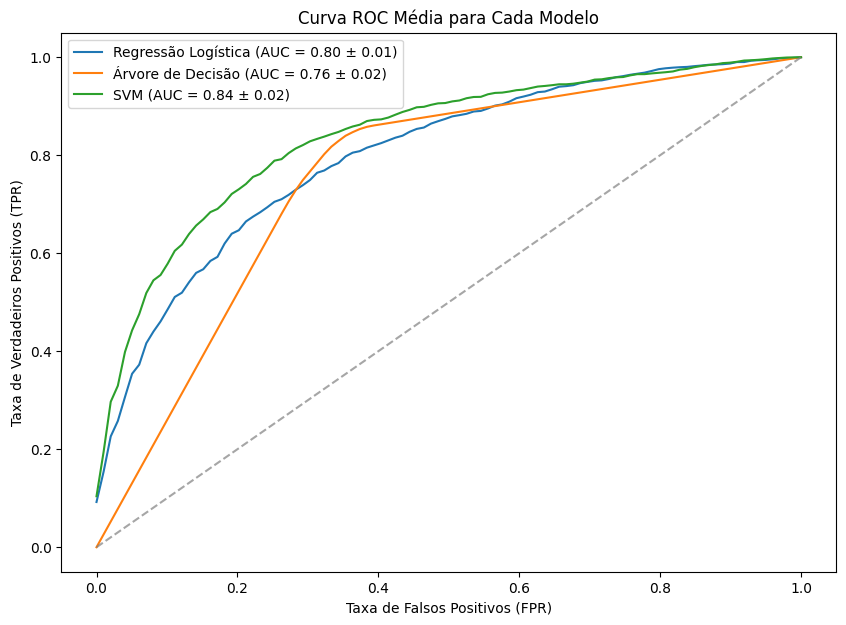

In [ ]:
models = {
    "Regressão Logística": LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    "Árvore de Decisão": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42, class_weight='balanced')
}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

plt.figure(figsize=(10, 7))

mean_fpr = np.linspace(0, 1, 100)
roc_curves = {}

for model_name, model in models.items():
    tprs = []
    aucs = []

    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Criar pipeline com pré-processamento e modelo
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', clone(model))
        ])

        pipeline.fit(X_train, y_train)

        y_probs = pipeline.predict_proba(X_test)[:, 1]

        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)

        tprs.append(np.interp(mean_fpr, fpr, tpr))
        aucs.append(roc_auc)

    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = np.mean(aucs)
    std_auc = np.std(aucs)

    roc_curves[model_name] = (mean_fpr, mean_tpr, mean_auc, std_auc)

    # Plotar curva ROC média
    plt.plot(mean_fpr, mean_tpr, label=f'{model_name} (AUC = {mean_auc:.2f} ± {std_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', alpha=0.7)

plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC Média para Cada Modelo')
plt.legend()
plt.show()

Eu escolheria o modelo do SVM, pois tem um AUC maior o que indica maior separação entre as classes.

In [ ]:
df_red = df[df['type'] == 'red'].drop(columns=['type'])
X_red = df_red.drop(columns=['opinion'])
y_red = df_red['opinion']


y_pred_red = pipeline.predict(X_red)

accuracy = accuracy_score(y_red, y_pred_red)
precision = precision_score(y_red, y_pred_red)
recall = recall_score(y_red, y_pred_red)
f1 = f1_score(y_red, y_pred_red)


# Exibir as métricas
print("Métricas para os Vinhos Tintos:")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Métricas para os Vinhos Tintos:
Acurácia: 0.4978
Precisão: 0.8312
Recall: 0.0752
F1-Score: 0.1379


In [ ]:
#Vamos colocar lado a lado as informações do vinho tinto e branco
df_red = df[df['type'] == 'red'].drop(columns=['type'])
X_red = df_red.drop(columns=['opinion'])
y_red = df_red['opinion']


y_pred_red = pipeline.predict(X_red)

accuracy = accuracy_score(y_red, y_pred_red)
precision = precision_score(y_red, y_pred_red)
recall = recall_score(y_red, y_pred_red)
f1 = f1_score(y_red, y_pred_red)



####Vinho Branco agora

df = df.dropna()
df_white = df[df['type'] == 'white'].drop(columns=['type'])
X = df_white.drop(columns=['opinion'])
y = df_white['opinion']

y_pred_white = pipeline.predict(X)

accuracy_white = accuracy_score(y, y_pred_white)
precision_white = precision_score(y, y_pred_white)
recall_white = recall_score(y, y_pred_white)
f1_white = f1_score(y, y_pred_white)

# Exibir as métricas
print("Métricas para os Vinhos Tintos:")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print()
print()
# Exibir as métricas
print("Métricas para os Vinhos Brancos:")
print(f"Acurácia: {accuracy_white:.4f}")
print(f"Precisão: {precision_white:.4f}")
print(f"Recall: {recall_white:.4f}")
print(f"F1-Score: {f1_white:.4f}")


Métricas para os Vinhos Tintos:
Acurácia: 0.4978
Precisão: 0.8312
Recall: 0.0752
F1-Score: 0.1379


Métricas para os Vinhos Brancos:
Acurácia: 0.7930
Precisão: 0.8897
Recall: 0.7864
F1-Score: 0.8349


Na acuracia e F1-Score os valores estão bem diferentes, acredito que o modelo não está generalizado e naõ está conseguindo detectar padrões do vinho tinto que tem caracteristicas sensoriais bem diferentes. Precisão e Recall podem estar "iguais" pois o modelo tem um desempenho ruim com a classe minoritaria. Resumindo: Esse modelo não está apto para prever os vinhos tintos, pois foi treinado com um tipo de vinho com caracteristicas bem diferentes
